# 1D Fourier Transform - introduction

<a id='ref'></a>
## References

* Yilmaz, Öz (2001). Seismic Data Analysis: Processing, Inversion, and Interpretation of Seismic Data, 2 ed.: Society of Exploration Geophysicists. ISBN 1-56080-098-4

In [1]:
import numpy as np
from scipy.fft import fft, ifft, fftshift, ifftshift, fftfreq
import matplotlib.pyplot as plt
import my_functions as mfun

<a id='sec1'></a>
## Fourier transform example

In [2]:
# number of samples
N = 800

In [3]:
# period (in seconds)
T0 = 1

In [4]:
# sampling interval (is seconds)
dt = T0/N
print(dt)

0.00125


In [5]:
# time (in seconds)
t = np.linspace(0, N*dt, N)

In [6]:
# auxiliary function to create our synthetic signal
def synthetic_signal(A, f, t):
    signal = np.zeros_like(t)
    for Ai, fi in zip(A, f):
        signal += Ai*np.sin(2*np.pi*fi*t)
    return signal

In [7]:
# We are gonna to create a signal formed by three sinusoid components.
# The lists below contain the frequency f (in Hertz) and the amplitude A
# of each component.
f = [ 2, 10, 30]
A = [15, 10,  5]

In [8]:
# This is our synthetic signal
signal = synthetic_signal(A, f, t)

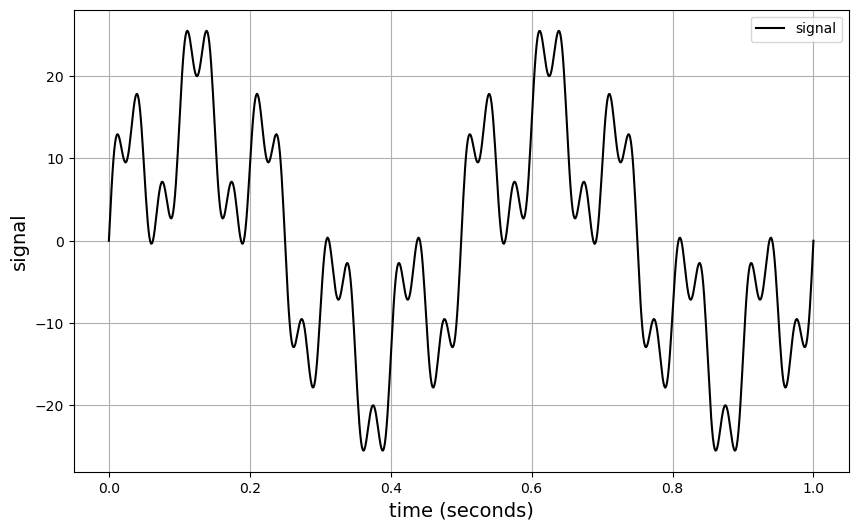

In [9]:
plt.figure(figsize=(10,6))
plt.plot(t, signal, 'k-', label='signal')
plt.xlabel('time (seconds)', fontsize=14)
plt.ylabel('signal', fontsize=14)
plt.legend(loc='best')
plt.grid()
plt.show()

The figure above shows our signal. Is it possible, by looking only the Figure above, determine the components forming our signal? The Figure below shows our synthetic signal (in black) and its components (in red, green and blue). 

In [10]:
# These are the components forming our synthetic signal
signal1 = synthetic_signal([A[0]], [f[0]], t)
signal2 = synthetic_signal([A[1]], [f[1]], t)
signal3 = synthetic_signal([A[2]], [f[2]], t)

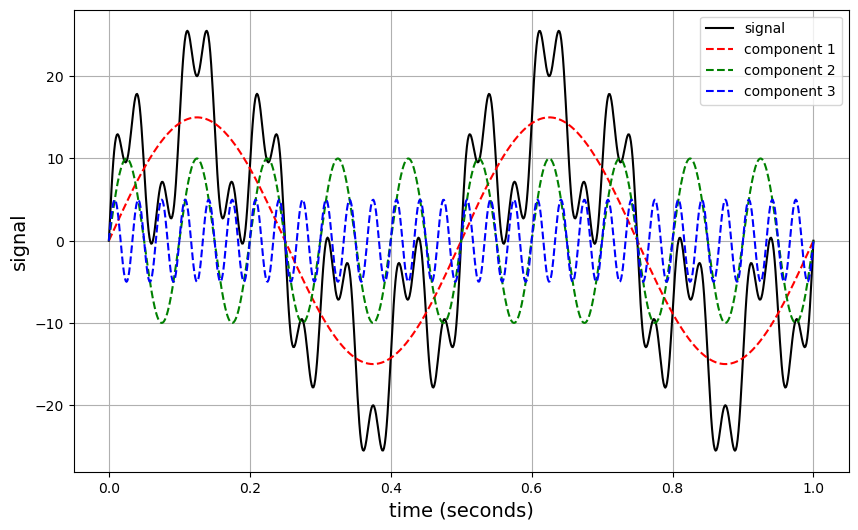

In [11]:
plt.figure(figsize=(10,6))
plt.plot(t, signal, 'k-', label='signal')
plt.plot(t, signal1, 'r--', label='component 1')
plt.plot(t, signal2, 'g--', label='component 2')
plt.plot(t, signal3, 'b--', label='component 3')
plt.xlabel('time (seconds)', fontsize=14)
plt.ylabel('signal', fontsize=14)
plt.legend(loc='best')
plt.grid()
plt.show()

The *Fourier Transform* identifies the components forming our synthetic signal.

In [12]:
# Fourier Transform of our signal
FT_signal = fft(x=signal, norm=None)

In [13]:
# Amplitude spectra of our signal
Amplitude = np.abs(FT_signal)

# For convenience, the amplitude is normalized by its maximum value
Amplitude /= np.max(Amplitude)

In [14]:
# Frequencies contained in our signal
freqs = fftfreq(n=N, d=dt)

In [15]:
# Some values in the first half of our frequency array 
freqs[:N//2:10]

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       330., 340., 350., 360., 370., 380., 390.])

In [16]:
# Some values in the last half of our frequency array 
freqs[N//2::10]

array([-400., -390., -380., -370., -360., -350., -340., -330., -320.,
       -310., -300., -290., -280., -270., -260., -250., -240., -230.,
       -220., -210., -200., -190., -180., -170., -160., -150., -140.,
       -130., -120., -110., -100.,  -90.,  -80.,  -70.,  -60.,  -50.,
        -40.,  -30.,  -20.,  -10.])

There are three important things here:
* the frequency array contains positive and negative values
* the positive values are stored in the first half
* the negative values are stored in the last half

In [17]:
# Minimum and maximum frequency values
np.min(freqs), np.max(freqs)

(-400.0, 399.0)

In [18]:
# The maximum absolute frequency is defined by the sampling interval dt 
1/(2*dt)

400.0

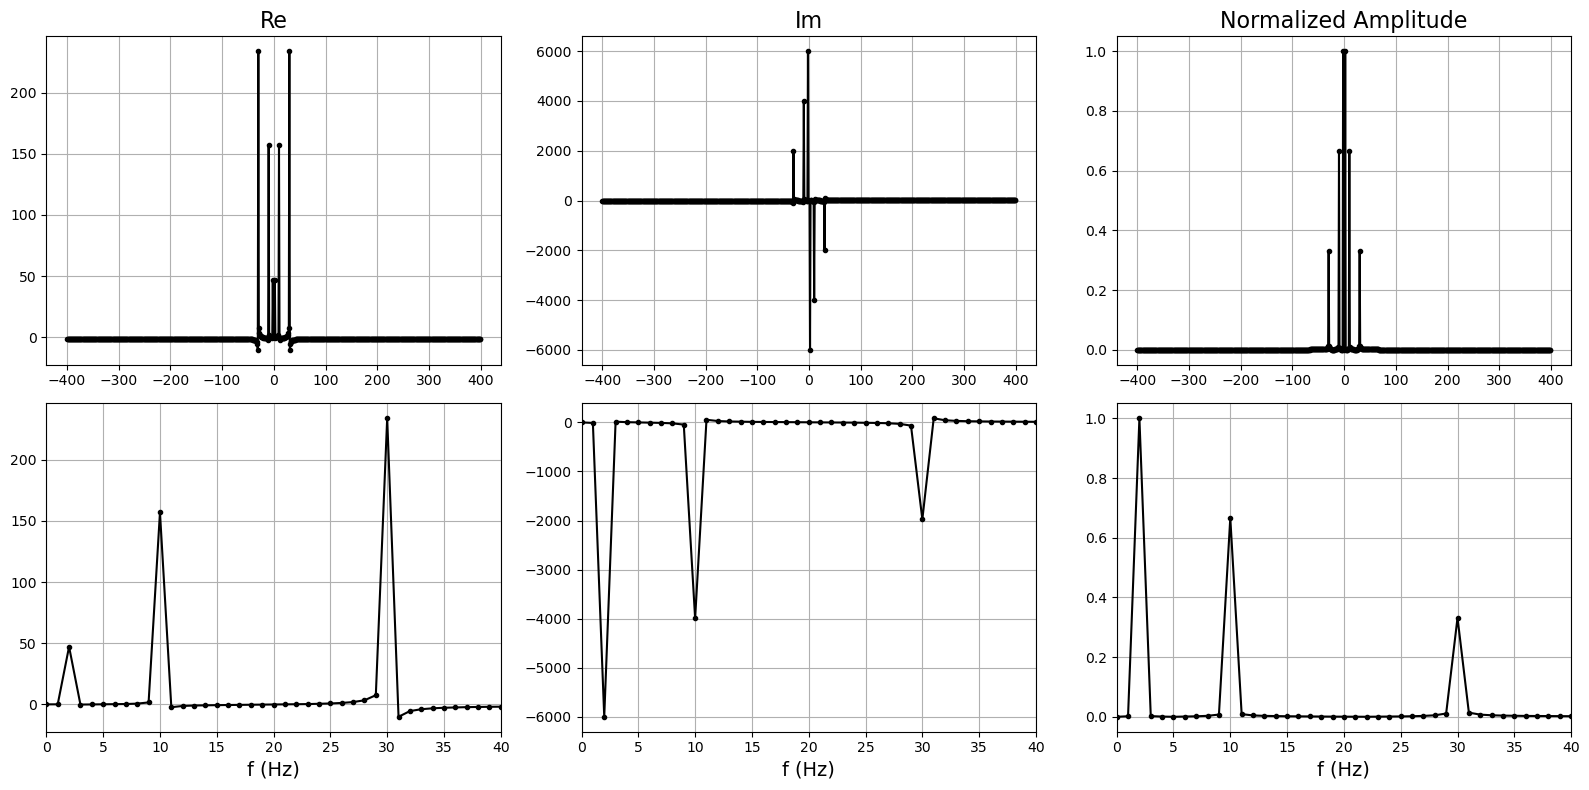

In [19]:
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
plt.title('Re', fontsize=16)
#plt.plot(freqs, FT_signal.real, 'r.-')
plt.plot(fftshift(freqs), fftshift(FT_signal).real, 'k.-')
plt.grid()
#plt.xlim(-20, 20)
#plt.xlabel('f (Hz)', fontsize=14)

plt.subplot(2,3,2)
plt.title('Im', fontsize=16)
#plt.plot(freqs, FT_signal.imag, 'b.-')
plt.plot(fftshift(freqs), fftshift(FT_signal).imag, 'k.-')
plt.grid()
#plt.xlabel('f (Hz)', fontsize=14)

plt.subplot(2,3,3)
plt.title('Normalized Amplitude', fontsize=16)
#plt.plot(freqs, Amplitude, 'r.-')
plt.plot(fftshift(freqs), fftshift(Amplitude), 'k.-')
plt.grid()
#plt.xlabel('f (Hz)', fontsize=14)

plt.subplot(2,3,4)
plt.plot(freqs[:N//2], FT_signal[:N//2].real, 'k.-')
plt.xlim(0,40)
plt.grid()
plt.xlabel('f (Hz)', fontsize=14)

plt.subplot(2,3,5)
plt.plot(freqs[:N//2], FT_signal[:N//2].imag, 'k.-')
plt.xlim(0,40)
plt.grid()
plt.xlabel('f (Hz)', fontsize=14)

plt.subplot(2,3,6)
plt.plot(freqs[:N//2], Amplitude[:N//2], 'k.-')
plt.xlim(0,40)
plt.grid()
plt.xlabel('f (Hz)', fontsize=14)

plt.tight_layout()

plt.show()

The upper panels in the Figure above show, from left to right, the Real and Imaginary parts of the Fourier Transform (yes, it is formed by complex numbers), as well as the its Normalized Amplitude spetra (the absolute values of the Fourier Transform). The bottom panels show a zoom of the upper panels along the positive frequencies. Notice that all bottom panels show three spikes at frequencies f = 2 Hz, f = 10 Hz and f = 30 Hz. What do you think about it? Are these spikes related to our signal?

Remeber that our signal is formed by three components with frequencies and amplitudes given by:

In [20]:
f

[2, 10, 30]

In [21]:
A

[15, 10, 5]

## Sampling

The cells below show how the sampling interval `dt` affects the Fourier Transform.

In [22]:
# number of samples
N_list = np.array([20, 60, 100, 200], dtype=int)

In [23]:
# sampling interval (is seconds)
dt_list = T0/N_list

In [24]:
T0

1

In [25]:
dt_list

array([0.05      , 0.01666667, 0.01      , 0.005     ])

In [26]:
# maximum frequency
fmax_list = []
for dti in dt_list:
    fmax_list.append(1/(2*dti))
print(fmax_list)

[10.0, 30.0, 50.0, 100.0]


In [27]:
# time (in seconds)
t_list = []
for dti, Ni in zip(dt_list, N_list):
    t_list.append(np.linspace(0, Ni*dti, Ni))

In [28]:
# signals obtained by using different dt
signal_list = []
for ti in t_list:
    signal_list.append(synthetic_signal(A, f, ti))

In [29]:
# fourier Transforms obtained by using different dt
FT_signal_list = []
for si in signal_list:
    FT_signal_list.append(fft(x=si, norm=None))

In [30]:
# Amplitudes obtained by using different dt
Amplitude_list = []
for fti in FT_signal_list:
    amp_max = np.max(np.abs(fti))
    Amplitude_list.append(np.abs(fti)/amp_max)

In [31]:
# Frequencies obtained by using different dt
freqs_list = []
for Ni, dti in zip(N_list, dt_list):
    freqs_list.append(fftfreq(n=Ni, d=dti))

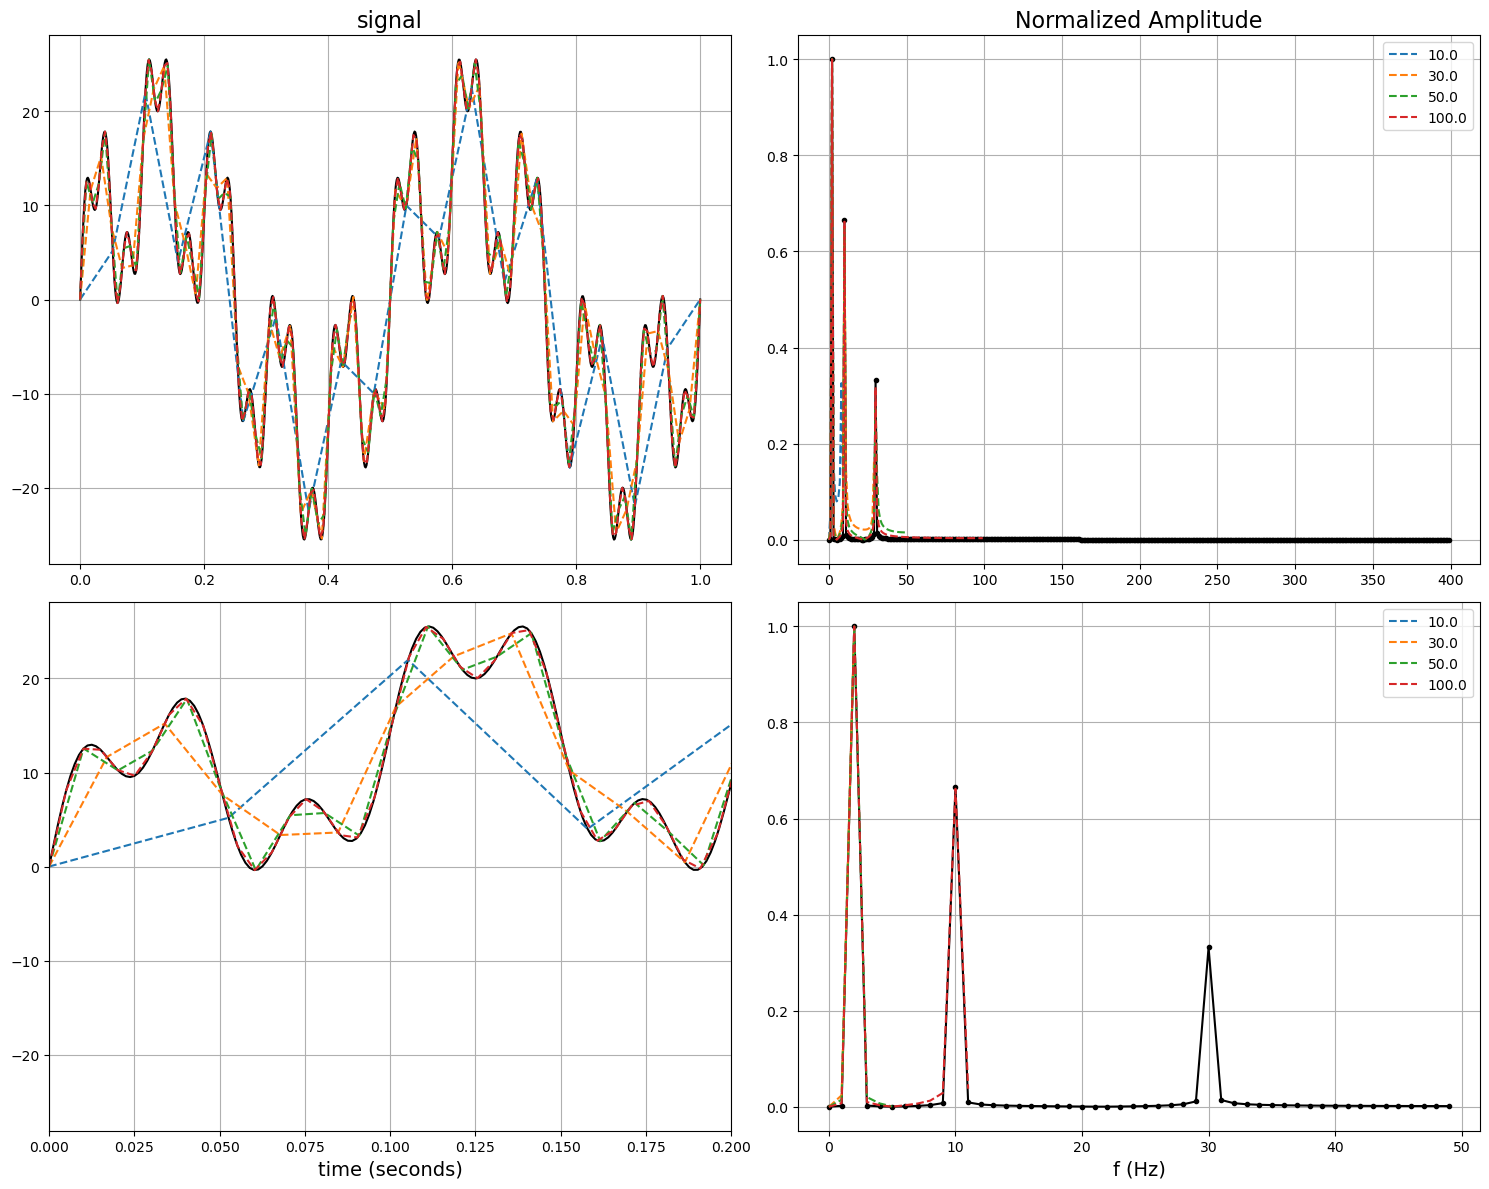

In [34]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.title('signal', fontsize=16)
plt.plot(t, signal, 'k-')
for ti, si,  fmaxi, in zip(t_list, signal_list, fmax_list):
    plt.plot(ti, si, '--', label='{:.3f}'.format(fmaxi))
#plt.xlabel('time (seconds)', fontsize=14)
#plt.legend(loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.title('Normalized Amplitude', fontsize=16)
plt.plot(freqs[:N//2], Amplitude[:N//2], 'k.-')
for fi, Ampi, fmaxi, Ni in zip(freqs_list, Amplitude_list, fmax_list, N_list):
    plt.plot(fi[:Ni//2], Ampi[:Ni//2], '--', label='{:4.1f}'.format(fmaxi))
plt.legend(loc='best')
plt.grid()
#plt.xlabel('f (Hz)', fontsize=14)

plt.subplot(2,2,3)
plt.plot(t, signal, 'k-')
for ti, si,  fmaxi, in zip(t_list, signal_list, fmax_list):
    plt.plot(ti, si, '--', label='{:.3f}'.format(fmaxi))
plt.xlabel('time (seconds)', fontsize=14)
plt.xlim(0, 0.2)
#plt.legend(loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.plot(freqs[:N//16], Amplitude[:N//16], 'k.-')
for fi, Ampi, fmaxi, Ni in zip(freqs_list, Amplitude_list, fmax_list, N_list):
    plt.plot(fi[:Ni//16], Ampi[:Ni//16], '--', label='{:4.1f}'.format(fmaxi))
#plt.xlim(0, 40)
plt.legend(loc='best')
plt.grid()
plt.xlabel('f (Hz)', fontsize=14)

plt.tight_layout()

plt.show()

The notebooks `fourier_1D_1`-`fourier_1D_5` aim at presenting a step-by-step definition of the 1D Fourier Transform.